##Classification using the PIMA dataset

The PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
col_names=['pregnancies',  'glucose', 'diastolic','triceps','insulin', 'bmi', 'dpf','age','diabetes']
df=pd.read_csv('pima-indians-diabetes.csv', names=col_names,header=None)

In [4]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum() # check how many missing values exist in the collection

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


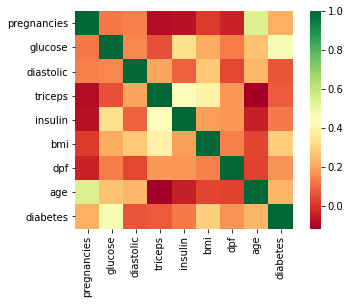

In [7]:
#See features which are positively correlated with diabetes, and which ones are negatively correlated.
import seaborn as sns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn') #df.corr() computes the pairwise correlation between columns:

 Create arrays/df for the features and the response variable

In [8]:
y=df['diabetes'].values
X=df.drop('diabetes', axis=1)

Handling missing data

In [9]:
X.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [10]:
feature_list=['glucose','diastolic','insulin','triceps','bmi','age'] # these features cannot possibly have a min which is equal to zero, therefore we will fill them with nan to impute them later
for i in feature_list:
  #print([X[i]==0])
  X[i]=X[i].replace(0, np.nan)
print(X)


     pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age
0              6    148.0       72.0     35.0      NaN  33.6  0.627   50
1              1     85.0       66.0     29.0      NaN  26.6  0.351   31
2              8    183.0       64.0      NaN      NaN  23.3  0.672   32
3              1     89.0       66.0     23.0     94.0  28.1  0.167   21
4              0    137.0       40.0     35.0    168.0  43.1  2.288   33
..           ...      ...        ...      ...      ...   ...    ...  ...
763           10    101.0       76.0     48.0    180.0  32.9  0.171   63
764            2    122.0       70.0     27.0      NaN  36.8  0.340   27
765            5    121.0       72.0     23.0    112.0  26.2  0.245   30
766            1    126.0       60.0      NaN      NaN  30.1  0.349   47
767            1     93.0       70.0     31.0      NaN  30.4  0.315   23

[768 rows x 8 columns]


In [11]:
print(X.isnull().sum())

pregnancies      0
glucose          5
diastolic       35
triceps        227
insulin        374
bmi             11
dpf              0
age              0
dtype: int64


Dropping missing data

In [12]:
X_nozeros=X.dropna() 
X_nozeros.shape ## this drops about half of the data which contain missing values(i.e features which have 0's) therefore we will impute the data instead of dropping it

(392, 8)

Imputing missing data 

In [13]:
X.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [14]:
from sklearn.impute import SimpleImputer
imp_common = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_common.fit(X)
X=imp_common.transform(X)

In [15]:
np.isnan(X).sum()

0

In [16]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 53.09630550130208
Standard Deviation of Unscaled Features: 57.95327296281436
Mean of Scaled Features: 5.233082485863368e-17
Standard Deviation of Scaled Features: 1.0


In [17]:
# Create training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4, random_state=42)

###K-Nearest Neighbors Classification (knn)

In [18]:
# Import KNN
from sklearn.neighbors import KNeighborsClassifier

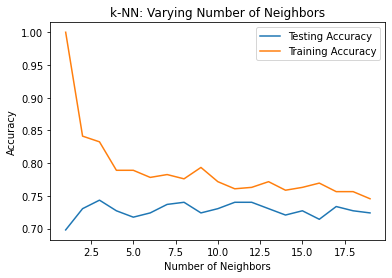

In [19]:
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set of the classifier's predictions
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


Hyperparameter tuning 

In [20]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
param_grid = {'n_neighbors': np.arange(1,20)}

# Instantiate a logistic regression classifier: logreg
knn = KNeighborsClassifier()

# Instantiate the GridSearchCV object: logreg_cv
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit it to the data
knn_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

Tuned Logistic Regression Parameters: {'n_neighbors': 18}
Best score is 0.726086956521739


Evaluating model performance

In [21]:
# Evaluating a model with tuned hyperparameters on a hold-out set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Predict the labels of the test data: y_pred
y_pred = knn_cv.predict(X_test)
#Compute the accuracy of the classification model
print("model score: %.3f" % knn_cv.score(X_test, y_test))
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

model score: 0.727
[[176  30]
 [ 54  48]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       206
           1       0.62      0.47      0.53       102

    accuracy                           0.73       308
   macro avg       0.69      0.66      0.67       308
weighted avg       0.72      0.73      0.72       308



###Logistic Regression

In [22]:
#Import Logisitc Regression
from sklearn.linear_model import LogisticRegression

Hyperparameter tuning

In [23]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV

#Logistic regression also has a regularization parameter: C controls the inverse of the regularization strength. 
#A large  can lead to an overfit model, while a small  can lead to an underfit model.

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)

param_grid = {'C': c_space}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=4000)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 0.006105402296585327}
Tuned Logistic Regression Accuracy: 0.7608695652173914


Evaluating performance


In [24]:
#Evaluating a model with tuned hyperparameters on a hold-out set
# Predict the labels of the test set: y_pred
y_pred = logreg_cv.predict(X_test)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[173  33]
 [ 40  62]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       206
           1       0.65      0.61      0.63       102

    accuracy                           0.76       308
   macro avg       0.73      0.72      0.73       308
weighted avg       0.76      0.76      0.76       308



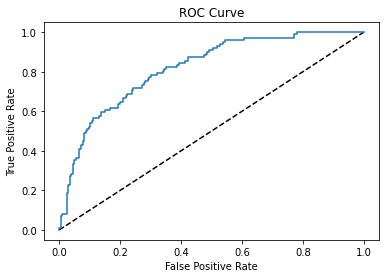

In [25]:
# Import necessary modules
from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1] #chose the second column, index=1 which is the prob of predicted label being 1
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression') #ROC curve provides a nice visual way to assess  classifier's performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [26]:
# Import necessary modules
from sklearn.metrics import  roc_auc_score
from sklearn.model_selection import cross_val_score
# Compute predicted probabilities: y_pred_prob
y_pred_prob=logreg_cv.predict_proba(X_test)[:,1]
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format((cv_auc)))
print("Average AUC score computed using 5-fold cross-validation: {}".format(np.mean(cv_auc)))
#If the classifer is corresct aoximately 50% of the time, the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5.
# If the AUC is greater than 0.5, the model is better than random guessing.

AUC: 0.8183894917190178
AUC scores computed using 5-fold cross-validation: [0.81407407 0.8        0.84907407 0.88301887 0.84509434]
Average AUC score computed using 5-fold cross-validation: 0.8382522711390636


###Decision Trees

In [27]:
#Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

Hyperparameter tuning

In [28]:
# Import necessary modules
from scipy.stats import randint

from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5) #RandomizedSearchCV will never outperform GridSearchCV. Instead, it is valuable because it saves on computation time.

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 8}
Best score is 0.7304347826086957


Evaluating the model

In [29]:
# Evaluating a model with tuned hyperparameters on a hold-out set
#Predict the labels of the test set: y_pred
y_pred = tree_cv.predict(X_test)
#Compute the accuracy of the classification model
print("model score: %.3f" % tree_cv.score(X_test, y_test))
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

model score: 0.734
[[160  46]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       206
           1       0.59      0.65      0.62       102

    accuracy                           0.73       308
   macro avg       0.70      0.71      0.71       308
weighted avg       0.74      0.73      0.74       308



###Support vector machine (SVM)

In [30]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC #Support vector classifier type of SVM

In [31]:
#Pipeline for SVM classification- building a pipeline that includes scaling and hyperparameter tuning

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100], #  C controls the regularization strength
              'SVM__gamma':[0.1, 0.01]} #Gamma controls the kernel coefficient:

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.7694805194805194
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       206
           1       0.68      0.57      0.62       102

    accuracy                           0.77       308
   macro avg       0.74      0.72      0.73       308
weighted avg       0.76      0.77      0.76       308

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}
